# TF-IDF using sklearn

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import time
import string
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 

In [18]:
def text_process(text):
    if type(text)!=str:
        return ''
    res = []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    english_stopwords = stopwords.words('english')
    tokens = [word for word in tokens if word not in (english_stopwords)]
    return tokens
data = pd.read_csv('fake_job_postings_imputed_text_cleaned.csv')
data['text'] = data['c_requirements']+' '+data['c_title']+' '+data['c_company_profile']+' '+data['c_benefits']+' '+data['c_description']
data['text_process'] = data['text'].apply(lambda x: " ".join(text_process(x)))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 
corpus = data['text_process'].tolist()
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names_out()  
transformer = TfidfTransformer()   
tfidf = transformer.fit_transform(X)  

In [20]:
tfidf.shape

(17496, 11992)

# TF-IDF using Hadoop

In [42]:
text = data.loc[:,['text_process']]
text.to_csv('text.txt',sep = '\t', header = None)

In [43]:
text

,text_process
0,
1,expect key responsibility communicate client t...
2,
3,education bachelor master business administrat...
4,rn license state science nursing managerial ex...
...,...
17491,ace role eat comprehensive work working enterp...
17492,b b accounting desire fun love genuine passion...
17493,
17494,


In [44]:
output1_path = "TFIDF_Hadoop/output1/part-r-00000"
pd.read_csv(output1_path,sep='\t',header = None)

,0,1
0,aa_10492,1
1,aa_10577,1
2,aa_10663,1
3,aa_10736,1
4,aa_10742,1
...,...,...
3110334,ﬁnd_12302,2
3110335,ﬁnd_14841,2
3110336,ﬁnd_233,1
3110337,ﬁnd_2345,1


In [45]:
output2_path = "TFIDF_Hadoop/output2/part-r-00000"
pd.read_csv(output2_path,sep='\t',header = None)

,0,1
0,pr_0,1/256
1,professional_0,1/256
2,offer_0,1/256
3,themcheerful_0,1/256
4,juggler_0,1/256
...,...,...
3110334,independently_9999,2/598
3110335,growth_9999,1/598
3110336,pm_9999,2/598
3110337,apartment_9999,1/598


In [46]:
output3_path = "TFIDF_Hadoop/output3/part-r-00000"
pd.read_csv(output3_path,sep='\t',header = None)

,0,1
0,aa@8013,0.005225
1,aa@6632,0.005069
2,aa@6995,0.009187
3,aa@14099,0.008836
4,aa@10492,0.003467
...,...,...
3110334,ﬁnd@233,0.008860
3110335,ﬁnd@2345,0.007669
3110336,ﬁnd@14841,0.020799
3110337,ﬁnd@12302,0.020507


# random forest

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import time
import string
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 

In [2]:
def text_process(text):
    if type(text)!=str:
        return ''
    res = []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    english_stopwords = stopwords.words('english')
    tokens = [word for word in tokens if word not in (english_stopwords)]
    return tokens
data = pd.read_csv('fake_job_postings_imputed_text_cleaned.csv')
data['text'] = data['c_requirements']+' '+data['c_title']+' '+data['c_company_profile']+' '+data['c_benefits']+' '+data['c_description']
data['text_process'] = data['text'].apply(lambda x: " ".join(text_process(x)))

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 
start = time.time()
corpus = data['text_process'].tolist()
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names_out()  
transformer = TfidfTransformer()   
tfidf = transformer.fit_transform(X)  
end = time.time()
print('Running time with sklearn: {:.4f} s'.format(end-start))

Running time with sklearn: 1.6651 s


In [4]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(tfidf, data.fraudulent, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,Y_train.values.ravel(),cv=5)

In [27]:
scores

array([0.95785714, 0.95569846, 0.95962844, 0.96141479, 0.95962844])

In [28]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [32]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [50,100,150],
}

cv = GridSearchCV(rf,parameters)
cv.fit(X_train,Y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'n_estimators': 50}

0.959 (+/-0.004) for {'n_estimators': 50}
0.959 (+/-0.004) for {'n_estimators': 100}
0.959 (+/-0.003) for {'n_estimators': 150}


In [35]:
cv.cv_results_

{'mean_fit_time': array([ 4.60545697,  9.32118998, 16.49069624]),
 'std_fit_time': array([0.12972576, 0.16909102, 4.02046613]),
 'mean_score_time': array([0.06251812, 0.1258853 , 0.28236713]),
 'std_score_time': array([0.00262702, 0.02100783, 0.15562832]),
 'param_n_estimators': masked_array(data=[50, 100, 150],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 150}],
 'split0_test_score': array([0.95785714, 0.95821429, 0.95785714]),
 'split1_test_score': array([0.95677028, 0.95677028, 0.956413  ]),
 'split2_test_score': array([0.9589139 , 0.95819936, 0.95927117]),
 'split3_test_score': array([0.96212933, 0.96212933, 0.96141479]),
 'split4_test_score': array([0.95962844, 0.95962844, 0.95962844]),
 'mean_test_score': array([0.95905982, 0.95898834, 0.95891691]),
 'std_test_score': array([0.00181411, 0.00181202, 0.00168901]),
 'rank_test_score': array([1, 2, 3])}

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
Y_predict = forest.predict(X_test)
accuracy_score(Y_test, Y_predict)

0.9645714285714285

In [35]:
print(classification_report(Y_test,Y_predict,target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3351
           1       1.00      0.17      0.29       149

    accuracy                           0.96      3500
   macro avg       0.98      0.58      0.63      3500
weighted avg       0.97      0.96      0.95      3500



In [36]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.040 seconds


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=word)
forest_importances=forest_importances.sort_values(ascending = False)[:30]

In [38]:
forest_importances

refined           0.013059
signing           0.009520
encouraged        0.009016
petroleum         0.008767
referral          0.007916
financing         0.007522
novation          0.007238
experience        0.007044
team              0.006952
scientifically    0.006408
oak               0.006354
wheel             0.005811
town              0.005483
gas               0.005071
unmatched         0.005036
tree              0.005030
bonus             0.004896
intellect         0.004758
purchasing        0.004593
affiliation       0.004205
time              0.004151
oil               0.004087
hired             0.004062
cartwright        0.004027
paired            0.003889
year              0.003874
medium            0.003835
duplex            0.003803
represented       0.003795
yearly            0.003736
dtype: float64

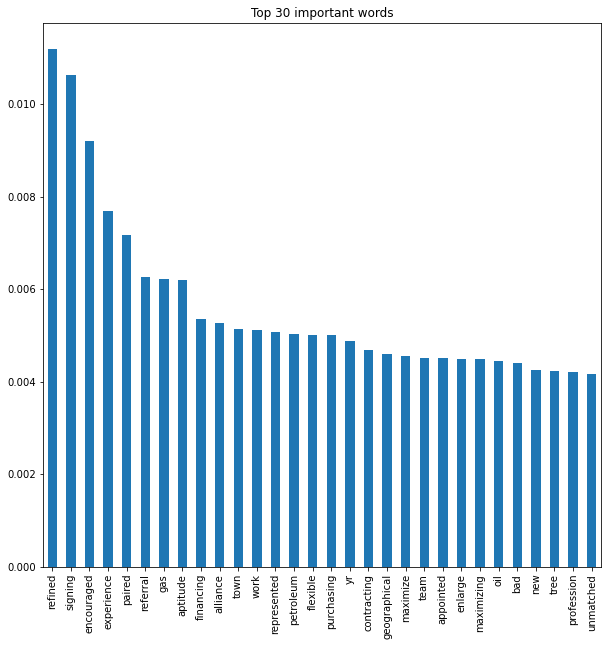

In [17]:
forest_importances.nlargest(30).plot(kind='bar',figsize=(10,10))
plt.title("Top 30 important words")
plt.show()

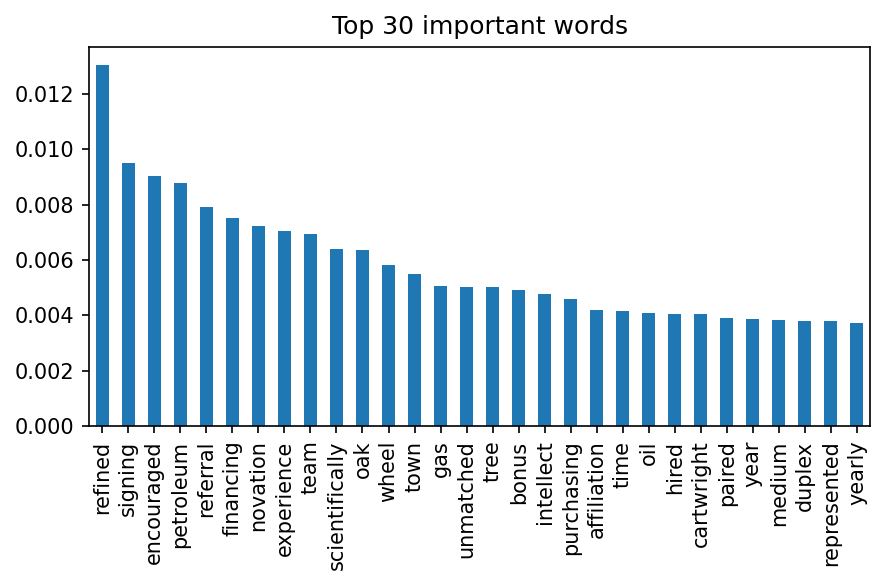

In [39]:
fig, ax = plt.subplots(dpi=150)
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 30 important words")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(forest, X_test.toarray(), Y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [33]:
len(importances)

11992

In [15]:
Y_predict = clf.predict(X_test)
accuracy_score(Y_test, Y_predict)

0.9654285714285714

In [23]:
print(classification_report(Y_test,Y_predict,target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3351
           1       1.00      0.19      0.32       149

    accuracy                           0.97      3500
   macro avg       0.98      0.59      0.65      3500
weighted avg       0.97      0.97      0.95      3500



Feature Importance

In [ ]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()

model.fit(X_train, Y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

In [ ]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=X_train.columns
)